# Stellar velocities and the Milky Way
---
Michael C. Stroh

michael.stroh@northwestern.edu

Center for Interdisciplinary Exploration and Research in Astrophysics

Northwestern University

2022


---



## 0. GENERAL BACKGROUND
### Viewing the Milky Way

We live in a barred spiral galaxy, the Milky Way. Below is an artist's concept of the Milky Way if one were able to look down upon it.

![Artist's Milky Way](https://github.com/mcstroh/python-tutorials/blob/main/velocity_stars_in_milky_way/images/ssc2008-10a_edited.png?raw=true)

We cannot take an image of the Milky Way because we live within it, in one of the spiral arms. Thus it is important to view the Milky Way in alternative ways in order to understand its structure.

To begin, we can build upon concepts that are more commonly used in other aspects of our lives. To begin with, let us review the common way we view the surface of the Earth.

![Longitude-latitude diagram view of the Earth](https://github.com/mcstroh/python-tutorials/blob/main/velocity_stars_in_milky_way/images/earth_l_b_comparison.png?raw=true)

We can view our galaxy, the Milky Way, in a similar manner. Below is an image of carbon-oxygen clouds in the Milky Way using a similar Longitude-Latitude coordinate system.

![Longitude-latitude diagram of the Milky Way](https://github.com/mcstroh/python-tutorials/blob/main/velocity_stars_in_milky_way/images/dame_l_b_simplified.png?raw=true)

This isn't particularly useful because the Milky Way looks pretty flat because most of the clouds reside in a very thin disk.
As an alternative, we can replace latitude with something else.
Below, we show a similar diagram where someone has plotted velocity of the clouds along the y-axis.

![Longitude-velocity diagram of the Milky Way](https://github.com/mcstroh/python-tutorials/blob/main/velocity_stars_in_milky_way/images/dame_l_v_simplified.png?raw=true)

## 1. INTRODUCTION AND DEFINITIONS

### 1.1 The Doppler effect

We often think of light as a wave, described by a wavelength (the distance between nearby peaks), or a frequency (how often peaks are detected).
If the star is stationary, the peaks of the wave will be detected at regular intervals as demonstrated in the Wikipedia image below (think of the circles as representing separate peaks of the wave moving away from the star):

![Sound emitted by a stationary source](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dopplereffectstationary.gif)

However, if the star is moving, an observer will measure a difference in the detected light.

![Sound emitted by a moving source](https://upload.wikimedia.org/wikipedia/commons/c/c9/Dopplereffectsourcemovingrightatmach0.7.gif)

If the star is moving away from you, the peaks will be much further apart (redshifting).

*   If a star is moving **away from you**, the peaks will be much further apart. This is referred to as **redshifting** because red light has a longer wavelength (lower frequency) than blue light.
*   If a star is moving **towards you**, the peaks will be much closer together. This is referred to as **blueshifting** because blue light has a shorter wavelength (higher frequency) than red light.


Therefore, if we know what the frequency of light **should be**, we can calculate the velocity of a star by measuring the frequency that we observe. In particular, we can find the velocity using:

$v = \bigg(1 - \frac{f_{observed}}{f_{stationary}} \bigg)c$

In this equation,
*    v is the velocity,
*    $f_{observed}$ is the frequency measured by the observer,
*    $f_{stationary}$ is the frequency when the star is stationary, and
*    c is the speed of light (approximately $3 \times 10^5$ km/s, or $6.706 \times 10^8$ miles/hour).


### Regarding units
Frequency is often measured in units of hertz (Hz), which indicates how many peaks arrive per second.
In this notebook we will commonly use units of GHz which are $10^9$ Hz.
Thus if observing light at 43 GHz, the wave of light peaks $43\times10^{9}$ times per second.

Since the frequencies are in a fraction in the velocity formula, their units will cancel out. So the units you use for the speed of light, will be the units of velocity at the end.

### 1.2 Clouds around the Stars



We will use observations of clouds surrounding old stars, referred to as Mira variables.
These stars are losing mass which feeds the clouds we are observing.
The stars cyle through being bright and dim, over periods of hundreds of days.

Below we show a movie
(from Diamond & Kemball, 2003) of the clouds in a similar star to the ones presented here.
The star is located in the center, but is not bright enough to be detected by these observations.
The 3 second movie spans an approximately 2 year period.

![VLBA SiO maser variability from Diamond & Kemball, 2003](https://github.com/mcstroh/python-tutorials/blob/master/velocity_stars_in_milky_way/images/diamond_kemball_sio_movie.gif?raw=true)


Although we are technically observing the clouds surrounding the stars, the velocity of the clouds will give us the velocity of the stars.



### 1.3 Goals for this project

<a href='https://public.nrao.edu/telescopes/vla/'>
<img src='https://www.nsf.gov/news/mmg/media/images/vlasunrisejuly2008_h.jpg' alt='VLA observatory' />
</a>

We will use the data collected from the Karl G. Jansky Very Large Array, often referred to as the VLA.
The VLA observes with 27 radio antennas and is located in New Mexico.

Generally, this notebook will guide you through:
* Download, load and plot a radio spectrum.
* Detect at least one spectral line in the spectrum you choose.
* Discover how fast the star is moving towards or away from you.
* Based on the velocity of the star, how does the star fit into the structure of the Milky Way?




The observations shared in this notebook are related to the <a href='http://www.phys.unm.edu/~baade/index.html'>Bulge Asymmetries and Dynamical Evolution (BAaDE)</a> survey.
The BAaDE survey performs a similar analysis to what you are performing here but for 28,062 stars across the Milky Way.
Some questions of interest to the BAaDE survey:
*   How does the galaxy look like based on the velocities of Mira variables?
*   What are the properties of the stars in the survey?
*   What causes the clouds surrounding the star to emit these spectral lines?

#### Important note going forward
When working through this project, it's OK to run into problems and struggle.
Make notes of what hurdles you are running into.
If you get stuck, write down what you know, and what you think you need to move forward.

### 1.4 Downloading and plotting a spectrum


Download the five VLA spectra by running the cell below.

In [143]:
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/VelocityOfStarsInTheMilkyWay/spectra/ad3a-16952.txt
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/VelocityOfStarsInTheMilkyWay/spectra/ad3a-16500.txt
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/VelocityOfStarsInTheMilkyWay/spectra/ad3a-17123.txt
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/VelocityOfStarsInTheMilkyWay/spectra/ad3a-17332.txt
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/VelocityOfStarsInTheMilkyWay/spectra/ad3a-18081.txt


--2024-07-25 23:37:59--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/VelocityOfStarsInTheMilkyWay/spectra/ad3a-16952.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128712 (126K) [text/plain]
Saving to: ‘ad3a-16952.txt.2’

ad3a-16952.txt.2    100%[===================>] 125.70K  --.-KB/s    in 0.03s   

2024-07-25 23:37:59 (4.69 MB/s) - ‘ad3a-16952.txt.2’ saved [128712/128712]

--2024-07-25 23:37:59--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Projects/VelocityOfStarsInTheMilkyWay/spectra/ad3a-16500.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109

It's always useful to plot the data to get a sense of what you're dealing with. Write code to plot the spectrum with flux (Jy) as the y-axis, and frequency (GHz) along the x-axis.
The flux is a measurement of how strong the spectrum is.

The files are formatted similar to the table below but with more than 4000 lines:
><p align='right'>Frequency (GHz)</p> |    <p align='right'>Flux (Jy)</p>
> --- | ---
>     <p align='right'>$42.3048852$</p> |   <p align='right'>$-0.0112890$</p>
>     <p align='right'>$42.3051352$</p> |   <p align='right'>$ 0.0055765$</p>
>     <p align='right'>$42.3053852$</p> |   <p align='right'>$-0.0218999$</p>
>     <p align='right'>$42.3056352$</p> |   <p align='right'>$ 0.0051897$</p>
>     <p align='right'>$42.3058852$</p> |   <p align='right'>$-0.0139943$</p>



I include an example of a spectrum to give you an idea of what you're looking for. But you may have fewer peaks in your figure.

![VLA radio spectrum from ce3a-00250](https://github.com/mcstroh/python-tutorials/blob/main/velocity_stars_in_milky_way/images/ce3a-00250.png?raw=true)

You have the freedom to customize how your figure looks.
Above all, make sure you're happy with your figure.

Hint: The pandas function read_fwf() may be useful to read the files.



In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_1 = pd.read_fwf('ad3a-16952.txt')
data_2 = pd.read_fwf('ad3a-16500.txt')
data_3 = pd.read_fwf('ad3a-17123.txt')
data_4 = pd.read_fwf('ad3a-17332.txt')
data_5 = pd.read_fwf('ad3a-18081.txt')

data_dict = {'data_1': 'ad3a-16952',
             'data_2': 'ad3a-16500',
             'data_3': 'ad3a-17123',
             'data_4': 'ad3a-17332',
             'data_5': 'ad3a-18081'}

data_1

,Frequency (GHz),Flux (Jy)
0,42.304885,-0.011329
1,42.305135,0.021881
2,42.305385,-0.016567
3,42.305635,0.023144
4,42.305885,0.019075
...,...,...
4146,43.350385,0.018197
4147,43.350635,0.000865
4148,43.350885,-0.008245
4149,43.351135,-0.002462


In [145]:
freq_1 = data_1['Frequency (GHz)']
flux_1 = data_1['Flux (Jy)']

Text(0, 0.5, 'Flux (Jy)')

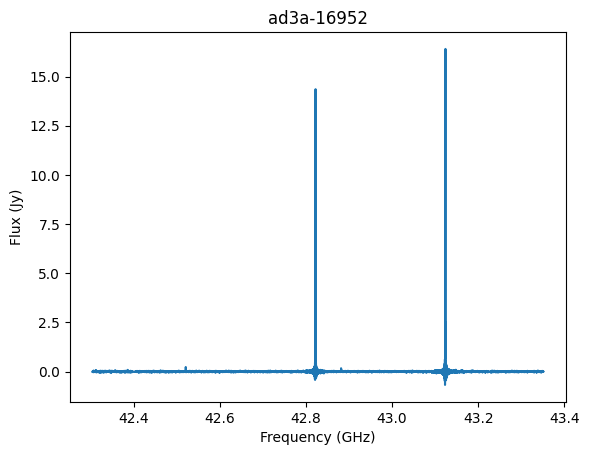

In [146]:
plt.plot(data_1['Frequency (GHz)'], data_1['Flux (Jy)'])
plt.title(data_dict['data_1'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')

Text(0, 0.5, 'Flux (Jy)')

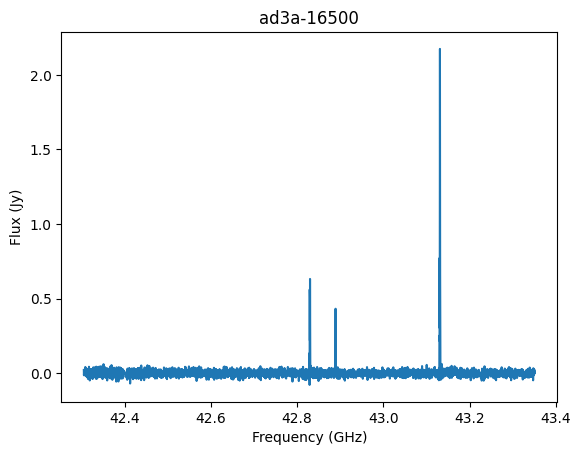

In [147]:
plt.plot(data_2['Frequency (GHz)'], data_2['Flux (Jy)'])
plt.title(data_dict['data_2'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')

Text(0, 0.5, 'Flux (Jy)')

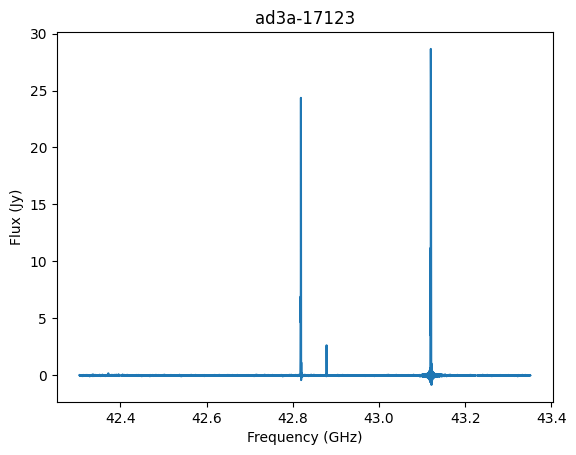

In [148]:
plt.plot(data_3['Frequency (GHz)'], data_3['Flux (Jy)'])
plt.title(data_dict['data_3'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')

Text(0, 0.5, 'Flux (Jy)')

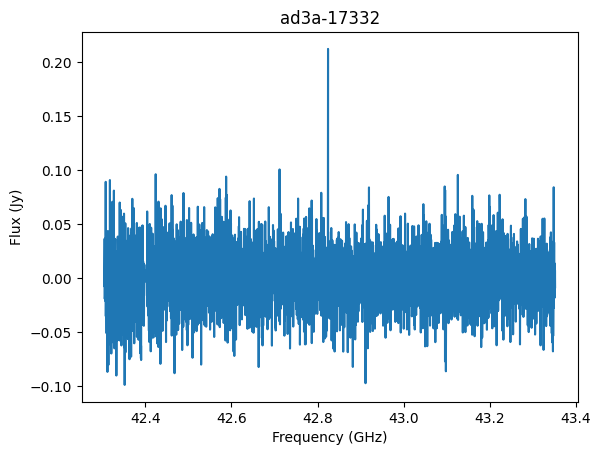

In [149]:
plt.plot(data_4['Frequency (GHz)'], data_4['Flux (Jy)'])
plt.title(data_dict['data_4'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')

Text(0, 0.5, 'Flux (Jy)')

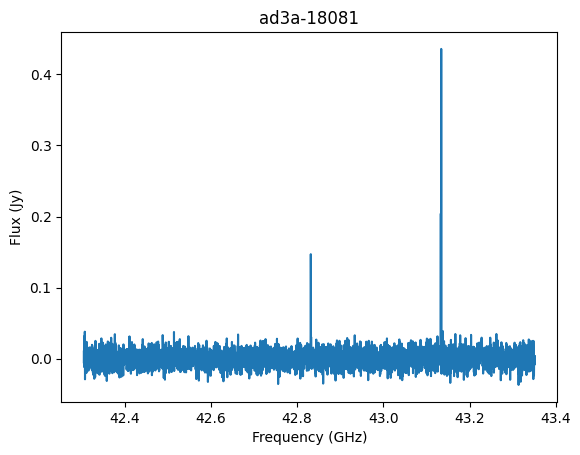

In [150]:
plt.plot(data_5['Frequency (GHz)'], data_5['Flux (Jy)'])
plt.title(data_dict['data_5'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')

### 1.5 Creating your own line detection function

Calculate the average flux of the spectrum. The NumPy "mean" function (https://numpy.org/doc/stable/reference/generated/numpy.mean.html), or Pandas "mean" function (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) may be useful.

In [151]:
avg_flux_1 = np.mean(data_1['Flux (Jy)'])
avg_flux_2 = np.mean(data_2['Flux (Jy)'])
avg_flux_3 = np.mean(data_3['Flux (Jy)'])
avg_flux_4 = np.mean(data_4['Flux (Jy)'])
avg_flux_5 = np.mean(data_5['Flux (Jy)'])

print(avg_flux_1)
print(avg_flux_2)
print(avg_flux_3)
print(avg_flux_4)
print(avg_flux_5)

0.015191663623223314
0.0025521483016140685
0.03699072211515297
-0.0005320163815947966
0.00029735593832811374


Now calculate the standard deviation of the flux in the spectrum. This gives an estimate of how wiggly the spectrum is. You can use the NumPy "std" function (https://numpy.org/doc/stable/reference/generated/numpy.std.html) or the Pandas "std" function (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html).

In [152]:
std_flux_1 = np.std(data_1['Flux (Jy)'])
std_flux_2 = np.std(data_2['Flux (Jy)'])
std_flux_3 = np.std(data_3['Flux (Jy)'])
std_flux_4 = np.std(data_4['Flux (Jy)'])
std_flux_5 = np.std(data_5['Flux (Jy)'])

print(std_flux_1)
print(std_flux_2)
print(std_flux_3)
print(std_flux_4)
print(std_flux_5)

0.41999036248281924
0.05047185957597388
0.7986715157100261
0.026718000200059416
0.01456976377061987


Astronomers often use the following formula to find spectral lines:

$D =~$average$~+~5~\times~$standard deviation

For a line to be detected, it must be brighter than this value.
Anything below this value is considered to be noise.

Using this formula, how bright must a line be in order for it to be detected?

In [153]:
D_flux_1 = avg_flux_1 + 5*std_flux_1
D_flux_2 = avg_flux_2 + 5*std_flux_2
D_flux_3 = avg_flux_3 + 5*std_flux_3
D_flux_4 = avg_flux_4 + 5*std_flux_4
D_flux_5 = avg_flux_5 + 5*std_flux_5

print(D_flux_1)
print(D_flux_2)
print(D_flux_3)
print(D_flux_4)
print(D_flux_5)

2.1151434760373196
0.2549114461814834
4.030348300665284
0.13305798461870227
0.07314617479142746


Create a **function** to find the frequency and flux of the peak of any line found in the spectrum you downloaded. You may want to use some of the previous steps, but are not required to do so!

If your file has multiple detected lines as shown in the plot you made above, first focus on finding one line.

In [154]:
def my_line_finder(frequency, flux):

    # Find peak - the values below are placeholders
    max_index = np.argmax(flux)
    peak_frequency = frequency[max_index]
    peak_flux = flux[max_index]

    # Send this information back
    return peak_frequency, peak_flux

#
# The code below is included so that you can focus on the function above.
#

# Now use the function you created
peak_frequency, peak_flux = my_line_finder(data_1['Frequency (GHz)'], data_1['Flux (Jy)'])

# Print the output
print(f"A spectral line was found at {peak_frequency} GHz, which has a peak flux of {peak_flux} Jy.")

A spectral line was found at 43.1238852 GHz, which has a peak flux of 16.4073 Jy.


In [155]:
peak_frequency, peak_flux = my_line_finder(data_2['Frequency (GHz)'], data_2['Flux (Jy)'])

# Print the output
print(f"A spectral line was found at {peak_frequency} GHz, which has a peak flux of {peak_flux} Jy.")

A spectral line was found at 43.1313852 GHz, which has a peak flux of 2.17373 Jy.


### 1.6 Finding all spectral lines (Optional)  


If your file has multiple lines, you can try creating another version of your function that finds *all* spectral lines!



In [156]:
def detection_finder(frequency, flux, data_set):

    avg_flux = np.mean(flux)
    std_flux = np.std(flux)
    D_flux = avg_flux + 5*std_flux

    freq_list = []
    flux_list = []
    for i in range(len(flux)):
      if flux[i] >= D_flux:
        freq_list.append(frequency[i])
        flux_list.append(flux[i])

    # alternative solution
    # detect_index = np.where(flux>=D_flux)[0]
    # freq_list = list(data_1['Frequency (GHz)'][detect_index])
    # flux_list = list(data_1['Flux (Jy)'][detect_index])

    detections = [freq_list, flux_list]

    print("Freq (GHz) Flux (Jy)")
    result = np.transpose(detections)
    for i in result:
      print(*i)
    print()
    print(f'There were {len(detections[0])} detections from the {data_set} data set.')

    # Send this information back
    return detections

In [157]:
detect_1 = detection_finder(data_1['Frequency (GHz)'], data_1['Flux (Jy)'], data_dict['data_1'])

Freq (GHz) Flux (Jy)
42.8221352 8.230195
42.8223852 14.3602
43.1236352 12.9659
43.1238852 16.4073
43.1243852 2.49603

There were 5 detections from the ad3a-16952 data set.


In [158]:
detect_2 = detection_finder(data_2['Frequency (GHz)'], data_2['Flux (Jy)'],data_dict['data_2'])

Freq (GHz) Flux (Jy)
42.8291352 0.5608825
42.8293852 0.5034055
42.8298852 0.6317025
42.8301352 0.294047
42.8891352 0.4320815
43.1306352 0.7726025
43.1308852 0.302298
43.1311352 0.9261235
43.1313852 2.17373
43.1316352 0.990389
43.1318852 0.6644565
43.1321352 0.41782

There were 12 detections from the ad3a-16500 data set.


In [159]:
detect_3 = detection_finder(data_3['Frequency (GHz)'], data_3['Flux (Jy)'], data_dict['data_3'])

Freq (GHz) Flux (Jy)
42.8181352 6.920915
42.8183852 4.64506
42.8186352 7.298905
42.8188852 24.356
42.8191352 8.914775
43.1196352 6.42612
43.1198852 11.1996
43.1203852 28.64865
43.1206352 26.12585
43.1208852 9.256465
43.1211352 7.74455

There were 11 detections from the ad3a-17123 data set.


In [160]:
detect_4 = detection_finder(data_4['Frequency (GHz)'], data_4['Flux (Jy)'], data_dict['data_4'])

Freq (GHz) Flux (Jy)
42.8241352 0.1797935
42.8243852 0.21201

There were 2 detections from the ad3a-17332 data set.


In [161]:
detect_5 = detection_finder(data_5['Frequency (GHz)'], data_5['Flux (Jy)'], data_dict['data_5'])

Freq (GHz) Flux (Jy)
42.8316352 0.1469765
42.8318852 0.1016765
43.1331352 0.200794
43.1333852 0.2040785
43.1336352 0.1150905
43.1341352 0.232841
43.1343852 0.435967

There were 7 detections from the ad3a-18081 data set.


## 2. YOUR TURN TO DO RESEARCH!
### 2.1 Calculating the velocity of the star



Recall from the Doppler effect section that we can find the velocity if we compare the detected frequency to the frequency that the line would be if the star were stationary.
Below is a table of possible frequencies for the lines in this sample.
Which line is closest in frequency to the line you found in Section 2?


> <p align='right'>#</p>|    <p align='right'>Frequency (GHz)</p>
> --- | ---
>  <p align='right'>$1$</p>   | <p align='right'>$42.373341$</p>
>  <p align='right'>$2$</p>   | <p align='right'>$42.519375$</p>
>  <p align='right'>$3$</p>   | <p align='right'>$42.583827$</p>
>  <p align='right'>$4$</p>   | <p align='right'>$42.820570$</p>
>  <p align='right'>$5$</p>   | <p align='right'>$42.879941$</p>
>  <p align='right'>$6$</p>   | <p align='right'>$43.122090$</p>
>  <p align='right'>$7$</p>   | <p align='right'>$43.423853$</p>


In [162]:
print(peak_frequency, peak_flux)

43.1313852 2.17373


> Line 6 with a frequency of 43.122090 GHz is the closest frequency to the peak frequency I found in section 1.5 for the ad3a-16952 data set.

Using the following equation to find the velocity of the star using the frequency you found above.
This is the same equation we introduced in the Doppler effect section above.

$v = \bigg(1 - \frac{f_{observed}}{f_{stationary}} \bigg)c$

In this equation
*    v is the velocity,
*    $f_{observed}$ is the frequency measured by the observer,
*    $f_{stationary}$ is the frequency when the star is stationary, and
*    c is the speed of light (approximately $3 \times 10^5$ km/s, or $6.706 \times 10^8$ miles/hour).


A positive velocity means the star is moving away from you, and a negative velocity means the star is moving towards you.

Is the star moving towards or away from you?

In [163]:
c = 3e5
f_obs = peak_frequency
f_stat = 43.122090
vel = (1-(f_obs/f_stat))*c
if vel > 0:
  pos_neg = 'positive'
  moving = 'away from'
elif vel < 0:
  pos_neg = 'negative'
  moving = 'towards'

print(f'The velocity of the star is {vel:.2f} km/s. Because the velocity of the star is {pos_neg}, the star is moving {moving} you.')

The velocity of the star is -64.67 km/s. Because the velocity of the star is negative, the star is moving towards you.


### (Optional - Requires Section 1.6) 2.2 Calculate the velocity of all spectral lines

Calculate the velocity of all spectral lines you found in Section 1.6.

In [164]:
stat_freq = [42.373341, 42.51937500, 42.58382700, 42.82057000, 42.87994100, 43.12209000, 43.42385300]

In [165]:
def all_vel(detect, stat_freq):
    obs_freq = detect[0]
    obs_flux = detect[1]
    vel_list = []
    stat_freq_list = []
    for i in range(len(obs_freq)):  #for each observed frequency
        freq = obs_freq[i]
        diff_freq = np.ones(len(stat_freq))
        for j in range(len(stat_freq)):  #for each stationary frequency
            diff_freq[j] = np.abs(stat_freq[j] - freq)
        #cl_freq: closest frequency
        #np.argmin(diff_freq) gives the index of the smallest difference
        cl_freq = stat_freq[np.argmin(diff_freq)]
        stat_freq_list.append(cl_freq)
        vel = (1-(freq/cl_freq))*c
        vel_list.append(vel)
    freq_array = [obs_flux, obs_freq, stat_freq_list, vel_list]
    print(f"{'Obs_Flux':>10s} {'Obs_Freq':>10s} {'St_Freq':>10s}  {'Vel(km/s)':>12s}")
    array_trans = np.transpose(freq_array)
    for i in array_trans:
        print(f'{i[0]:>10.6f} {i[1]:>10.6f} {i[2]:>10.6f} {i[3]:>12.6f}')

    return vel_list

In [166]:
vel_1 = all_vel(detect_1, stat_freq)

  Obs_Flux   Obs_Freq    St_Freq     Vel(km/s)
  8.230195  42.822135  42.820570   -10.965758
 14.360200  42.822385  42.820570   -12.717252
 12.965900  43.123635  43.122090   -10.749943
 16.407300  43.123885  43.122090   -12.489191
  2.496030  43.124385  43.122090   -15.967686


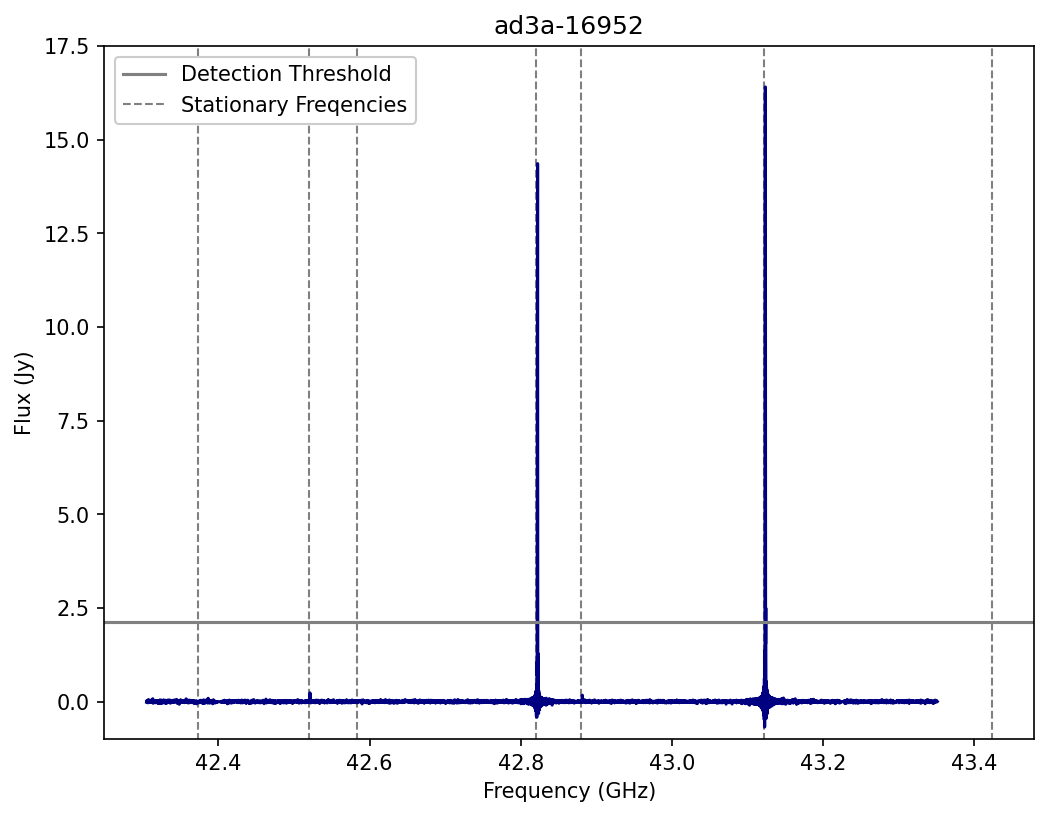

In [167]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(data_1['Frequency (GHz)'], data_1['Flux (Jy)'], color='navy')
plt.axhline(D_flux_1, color='gray', label='Detection Threshold')
plt.vlines(stat_freq, ymin=-10, ymax=25, color='gray',
           zorder=-1, ls='--', lw=1, label = 'Stationary Freqencies')
plt.ylim(-1, 17.5)
plt.title(data_dict['data_1'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left', framealpha=1)

How well do the velocities agree? Are there any outliers?

> The velocities have a wide range of 5 km/s.

## (Optional) 3. Running your code on multiple stars

Calculate the velocity of all of the stars using all five files you downloaded at the start.
It may be useful to use a loop.
Make notes of problems that you run into.
This isn't a simple task!

In [168]:
vel_2 = all_vel(detect_2, stat_freq)

  Obs_Flux   Obs_Freq    St_Freq     Vel(km/s)
  0.560882  42.829135  42.820570   -60.007608
  0.503405  42.829385  42.820570   -61.759103
  0.631702  42.829885  42.820570   -65.262092
  0.294047  42.830135  42.820570   -67.013587
  0.432082  42.889135  42.879941   -64.325182
  0.772602  43.130635  43.122090   -59.448881
  0.302298  43.130885  43.122090   -61.188129
  0.926123  43.131135  43.122090   -62.927377
  2.173730  43.131385  43.122090   -64.666624
  0.990389  43.131635  43.122090   -66.405872
  0.664457  43.131885  43.122090   -68.145120
  0.417820  43.132135  43.122090   -69.884368


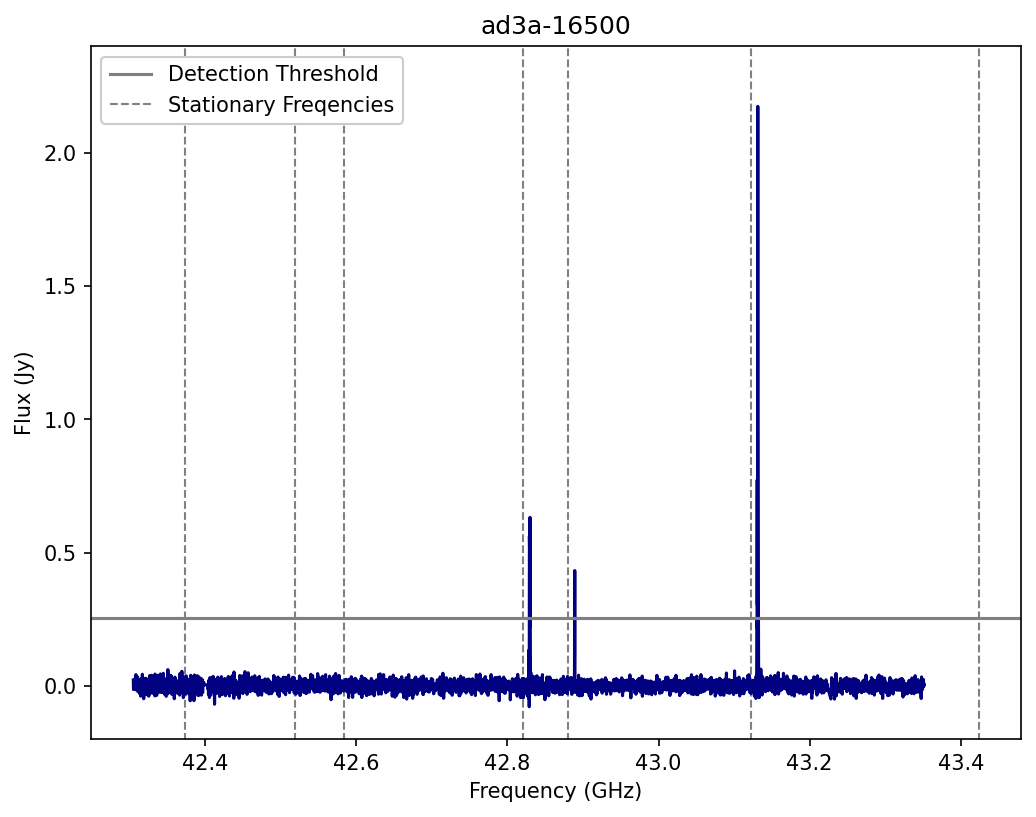

In [169]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(data_2['Frequency (GHz)'], data_2['Flux (Jy)'], color='navy')
plt.axhline(D_flux_2, color='gray', label='Detection Threshold')
plt.vlines(stat_freq, ymin=-10, ymax=25, color='gray',
           zorder=-1, ls='--', lw=1, label = 'Stationary Freqencies')
plt.ylim(-0.2, 2.4)
plt.title(data_dict['data_2'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left', framealpha=1)

In [170]:
vel_3 = all_vel(detect_3, stat_freq)

  Obs_Flux   Obs_Freq    St_Freq     Vel(km/s)
  6.920915  42.818135  42.820570    17.058157
  4.645060  42.818385  42.820570    15.306662
  7.298905  42.818635  42.820570    13.555168
 24.356000  42.818885  42.820570    11.803673
  8.914775  42.819135  42.820570    10.052178
  6.426120  43.119635  43.122090    17.078022
 11.199600  43.119885  43.122090    15.338774
 28.648650  43.120385  43.122090    11.860279
 26.125850  43.120635  43.122090    10.121031
  9.256465  43.120885  43.122090     8.381783
  7.744550  43.121135  43.122090     6.642535


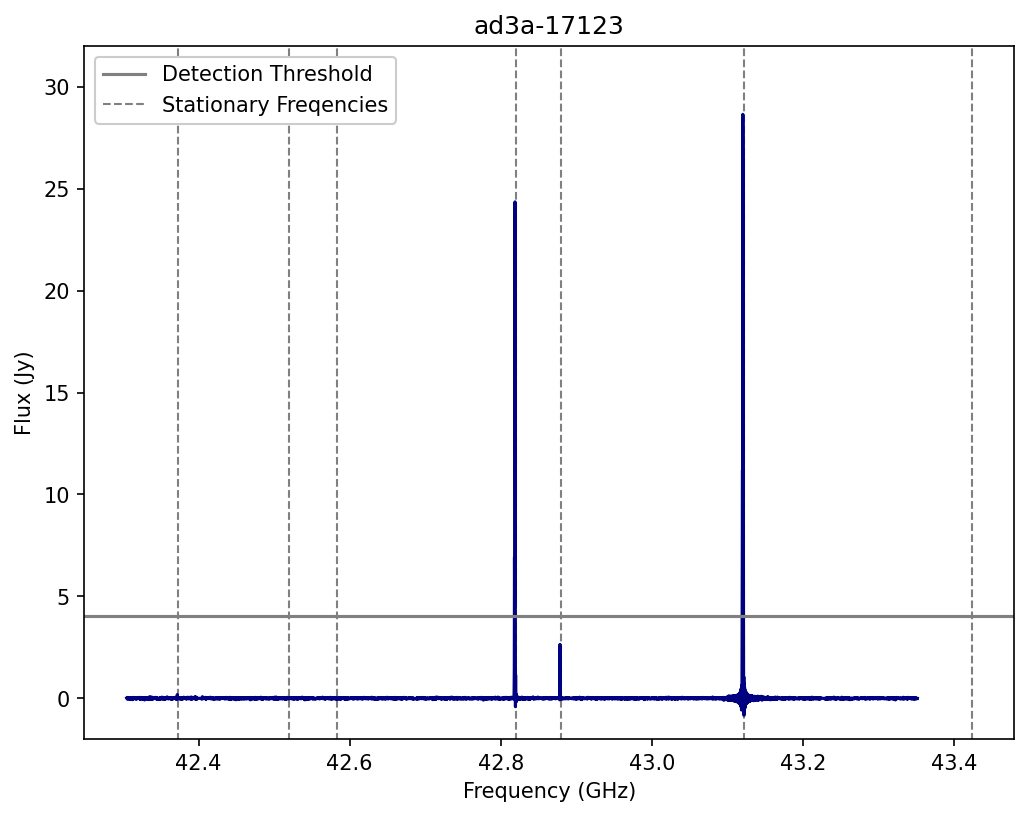

In [171]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(data_3['Frequency (GHz)'], data_3['Flux (Jy)'], color='navy')
plt.axhline(D_flux_3, color='gray', label='Detection Threshold')
plt.vlines(stat_freq, ymin=-10, ymax=35, color='gray',
           zorder=-1, ls='--', lw=1, label = 'Stationary Freqencies')
plt.ylim(-2, 32)
plt.title(data_dict['data_3'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left', framealpha=1)

In [172]:
vel_4 = all_vel(detect_4, stat_freq)

  Obs_Flux   Obs_Freq    St_Freq     Vel(km/s)
  0.179793  42.824135  42.820570   -24.977715
  0.212010  42.824385  42.820570   -26.729210


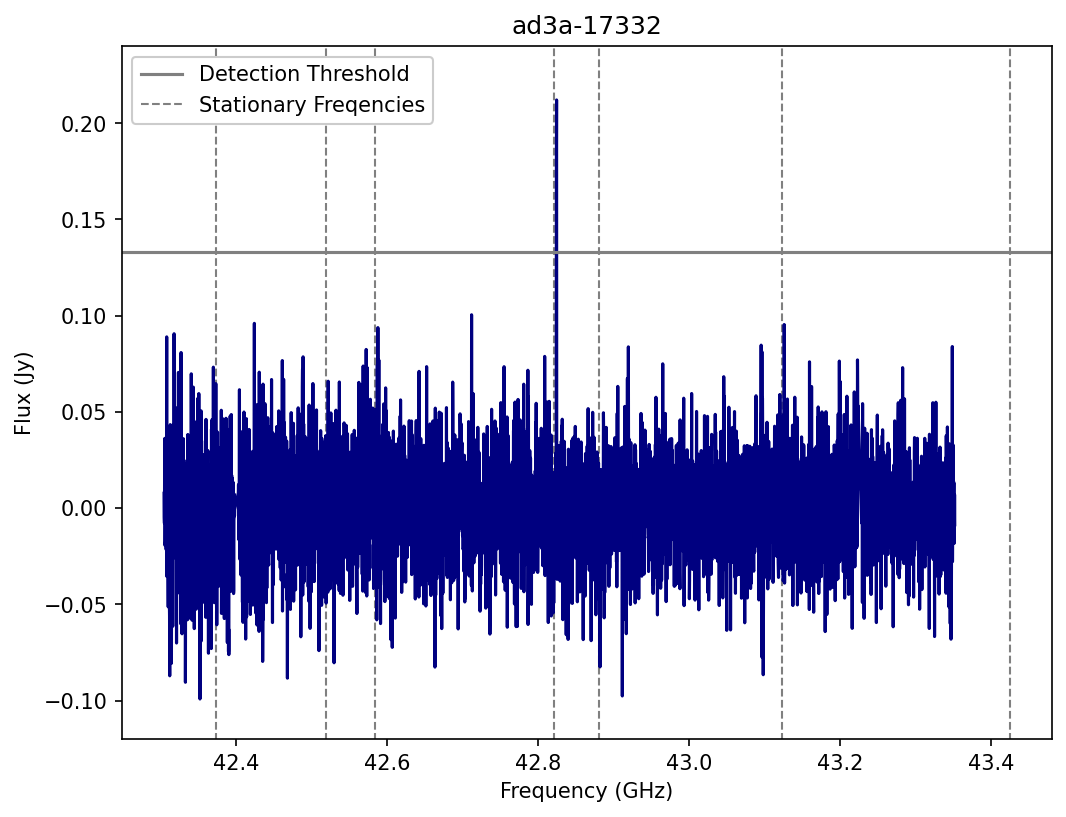

In [173]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(data_4['Frequency (GHz)'], data_4['Flux (Jy)'], color='navy')
plt.axhline(D_flux_4, color='gray', label='Detection Threshold')
plt.vlines(stat_freq, ymin=-10, ymax=25, color='gray',
           zorder=-1, ls='--', lw=1, label='Stationary Freqencies')
plt.ylim(-0.12, 0.24)
plt.title(data_dict['data_4'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left', framealpha=1)

In [174]:
vel_5 = all_vel(detect_5, stat_freq)

  Obs_Flux   Obs_Freq    St_Freq     Vel(km/s)
  0.146977  42.831635  42.820570   -77.522555
  0.101677  42.831885  42.820570   -79.274050
  0.200794  43.133135  43.122090   -76.841359
  0.204078  43.133385  43.122090   -78.580607
  0.115090  43.133635  43.122090   -80.319855
  0.232841  43.134135  43.122090   -83.798350
  0.435967  43.134385  43.122090   -85.537598


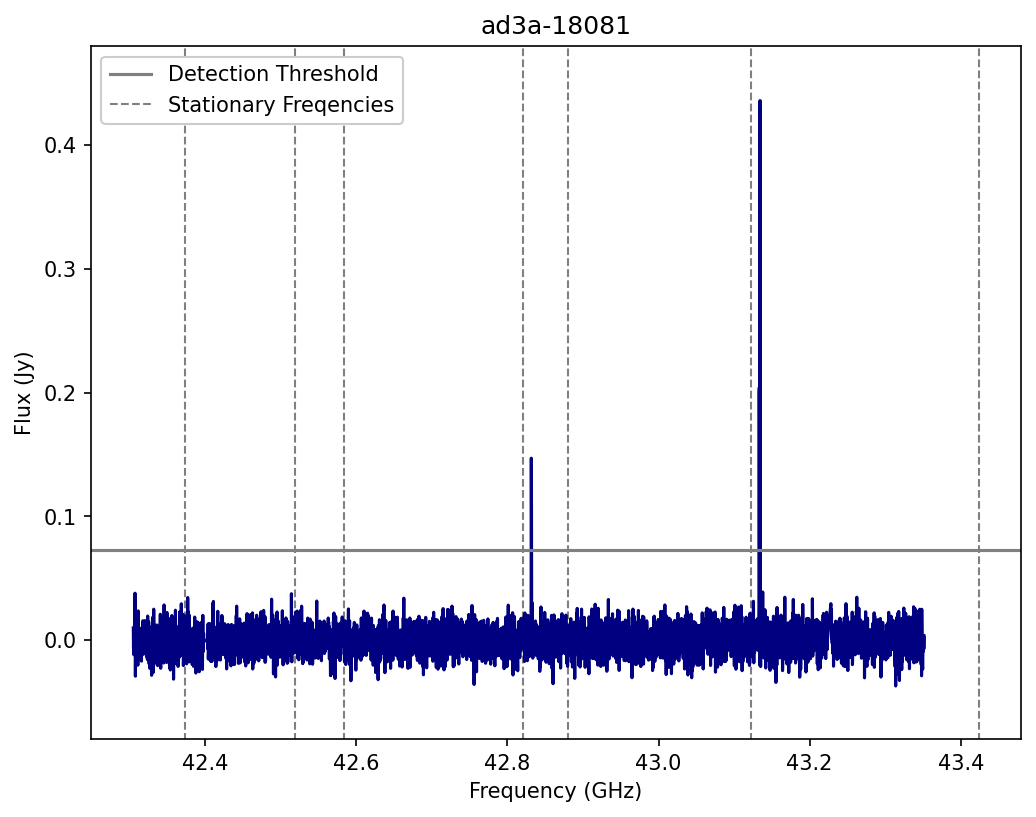

In [175]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(data_5['Frequency (GHz)'], data_5['Flux (Jy)'], color='navy')
plt.axhline(D_flux_5, color='gray', label='Detection Threshold')
plt.vlines(stat_freq, ymin=-10, ymax=25, color='gray',
           zorder=-1, ls='--', lw=1, label='Stationary Freqencies')
plt.ylim(-0.08, 0.48)
plt.title(data_dict['data_5'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left', framealpha=1)

### (Optional) 3.1 A single velocity for each star

Some files have multiple spectral lines and they likely agree.
If this is the case, calculate a single velocity for each star by calculating the average of the velocities you found for the star.
Also state the error in the average velocity using:

average error = standard deviation/$\sqrt(N)$

where N is the number of data points used to calculate the average.

In [176]:
avg_vel_1 = np.mean(vel_1)
std_vel_1 = np.std(vel_1)
avg_error_1 = std_vel_1/(np.sqrt(len(vel_1)))
print(f"For {data_dict['data_1']}, the average velocity was {avg_vel_1:.4f} km/s "
      f"with an average error of ±{avg_error_1:.4f} km/s.")

For ad3a-16952, the average velocity was -12.5780 km/s with an average error of ±0.8357 km/s.


In [177]:
avg_vel_2 = np.mean(vel_2)
std_vel_2 = np.std(vel_2)
avg_error_2 = std_vel_2/(np.sqrt(len(vel_2)))
print(f"For {data_dict['data_2']}, the average velocity was {avg_vel_2:.4f} km/s "
      f"with an average error of ±{avg_error_2:.4f} km/s.")

For ad3a-16500, the average velocity was -64.2528 km/s with an average error of ±0.9082 km/s.


If you were only to consider the highest flux for each of the stationary frequencies, you'd get a better result.

In [178]:
vel_2 = all_vel(detect_2, stat_freq)

  Obs_Flux   Obs_Freq    St_Freq     Vel(km/s)
  0.560882  42.829135  42.820570   -60.007608
  0.503405  42.829385  42.820570   -61.759103
  0.631702  42.829885  42.820570   -65.262092
  0.294047  42.830135  42.820570   -67.013587
  0.432082  42.889135  42.879941   -64.325182
  0.772602  43.130635  43.122090   -59.448881
  0.302298  43.130885  43.122090   -61.188129
  0.926123  43.131135  43.122090   -62.927377
  2.173730  43.131385  43.122090   -64.666624
  0.990389  43.131635  43.122090   -66.405872
  0.664457  43.131885  43.122090   -68.145120
  0.417820  43.132135  43.122090   -69.884368


For ad3a-16500, that would be  
```
Obs_Flux  Obs_Freq   St_Freq     Vel(km/s)
0.631702  42.829885  42.820570   -65.262092
0.432082  42.889135  42.879941   -64.325182
2.173730  43.131385  43.122090   -64.666624
```

In [179]:
avg_vel_2_peak = np.mean([vel_2[2], vel_2[4], vel_2[8]])
std_vel_2_peak = np.std([vel_2[2], vel_2[4], vel_2[8]])
avg_error_2_peak = std_vel_2_peak/(np.sqrt(3))
print(f"With only the peak fluxes, for {data_dict['data_2']}, the average velocity was "
      f"{avg_vel_2_peak:.4f} km/s with an average error of ±{avg_error_2_peak:.4f} km/s.")

With only the peak fluxes, for ad3a-16500, the average velocity was -64.7513 km/s with an average error of ±0.2235 km/s.


In [180]:
avg_vel_3 = np.mean(vel_3)
std_vel_3 = np.std(vel_3)
avg_error_3 = std_vel_3/(np.sqrt(len(vel_3)))
print(f"For {data_dict['data_3']}, the average velocity was {avg_vel_3:.4f} km/s "
      f"with an average error of ±{avg_error_3:.4f} km/s.")

For ad3a-17123, the average velocity was 12.4726 km/s with an average error of ±1.0066 km/s.


In [181]:
avg_vel_4 = np.mean(vel_4)
std_vel_4 = np.std(vel_4)
avg_error_4 = std_vel_4/(np.sqrt(len(vel_4)))
print(f"For {data_dict['data_4']}, the average velocity was {avg_vel_4:.4f} km/s "
      f"with an average error of ±{avg_error_4:.4f} km/s.")

For ad3a-17332, the average velocity was -25.8535 km/s with an average error of ±0.6192 km/s.


In [182]:
avg_vel_5 = np.mean(vel_5)
std_vel_5 = np.std(vel_5)
avg_error_5 = std_vel_5/(np.sqrt(len(vel_5)))
print(f"For {data_dict['data_5']}, the average velocity was {avg_vel_5:.4f} km/s "
      f"with an average error of ±{avg_error_5:.4f} km/s.")

For ad3a-18081, the average velocity was -80.2678 km/s with an average error of ±1.1370 km/s.


## (Optional) 4. A better noise calculation

In Section 2 you calculated the detection threshold using

$D =~$average$~+~5~\times~$standard deviation

but the average and the standard deviation took into account the bright spectral lines.
To go a little deeper, recalculate the average, and standard deviation of the flux values after throwing away the brightest 5% and lowest 5% of flux values.
Using these more robust calculations of the average and standard deviations of the noise, recalculate D.
Repeat the analysis you previously did in Section 2-4 with this updated value.

**If running on multiple files, make sure the D you use to calculate is based on the file you are using and not on a different file.**

In [183]:
def detection_finder_trim(D_flux, freq, flux, data_set):
    freq_list = []
    flux_list = []
    for i in range(len(freq)):
      if flux[i] >= D_flux:
        freq_list.append(freq[i])
        flux_list.append(flux[i])

    detections = [freq_list, flux_list]

    print("Freq (GHz) Flux (Jy)")
    result = np.transpose(detections)
    for i in result:
      print(*i)
    print()
    print(f'There were {len(detections[0])} detections from the {data_set} data set '
          f'with the trimmed detection Threshold.')

    # Send this information back
    return detections

In [184]:
def trimmed_D_flux(data):
    data_sort = data.sort_values(by=['Flux (Jy)'])
    data_sort.reset_index(drop=True, inplace=True)
    fp_data = int(0.05*len(data_sort['Flux (Jy)'])) #fp_data = length of five percent
    data_trim = data_sort.iloc[fp_data:-fp_data] #drops first and last five percent
    data_trim.reset_index(drop=True, inplace=True)

    avg_flux_trim = np.mean(data_trim['Flux (Jy)'])
    std_flux_trim = np.std(data_trim['Flux (Jy)'])
    D_flux_trim = avg_flux_trim + 5*std_flux_trim

    return D_flux_trim

In [185]:
D_flux_1_trim = trimmed_D_flux(data_1)
D_flux_2_trim = trimmed_D_flux(data_2)
D_flux_3_trim = trimmed_D_flux(data_3)
D_flux_4_trim = trimmed_D_flux(data_4)
D_flux_5_trim = trimmed_D_flux(data_5)

In [186]:
print(D_flux_1, D_flux_1_trim)
print(D_flux_2, D_flux_2_trim)
print(D_flux_3, D_flux_3_trim)
print(D_flux_4, D_flux_4_trim)
print(D_flux_5, D_flux_5_trim)

2.1151434760373196 0.0874120060839555
0.2549114461814834 0.06958556819235331
4.030348300665284 0.09461129440979534
0.13305798461870227 0.10107458376512818
0.07314617479142746 0.0438408659602235


In [187]:
detect_1_trim = detection_finder_trim(D_flux_1_trim,
                                      data_1['Frequency (GHz)'],
                                      data_1['Flux (Jy)'],
                                      data_dict['data_1'])

Freq (GHz) Flux (Jy)
42.3863852 0.0887166
42.5211352 0.2342215
42.8151352 0.1074035
42.8166352 0.1101939
42.8171352 0.0988901
42.8176352 0.1130195
42.8181352 0.1177305
42.8186352 0.1376195
42.8191352 0.1740125
42.8196352 0.1999625
42.8201352 0.250751
42.8206352 0.2950325
42.8211352 0.4539305
42.8216352 1.06013
42.8218852 0.695256
42.8221352 8.230195
42.8223852 14.3602
42.8226352 0.468631
42.8228852 1.28671
42.8233852 0.4203555
42.8238852 0.2940415
42.8243852 0.219071
42.8248852 0.1821695
42.8253852 0.145287
42.8258852 0.1191815
42.8263852 0.1166915
42.8268852 0.0983674
42.8273852 0.1049755
42.8278852 0.1043855
42.8288852 0.0888105
42.8338852 0.0910789
42.8816352 0.1714615
43.1161352 0.1061257
43.1171352 0.1078757
43.1176352 0.0901779
43.1181352 0.1344955
43.1186352 0.1139365
43.1191352 0.1414605
43.1196352 0.1354305
43.1201352 0.1945855
43.1206352 0.2403
43.1211352 0.234575
43.1216352 0.2954135
43.1221352 0.413123
43.1226352 0.6236055
43.1231352 1.364695
43.1233852 0.6806625
43.1236352

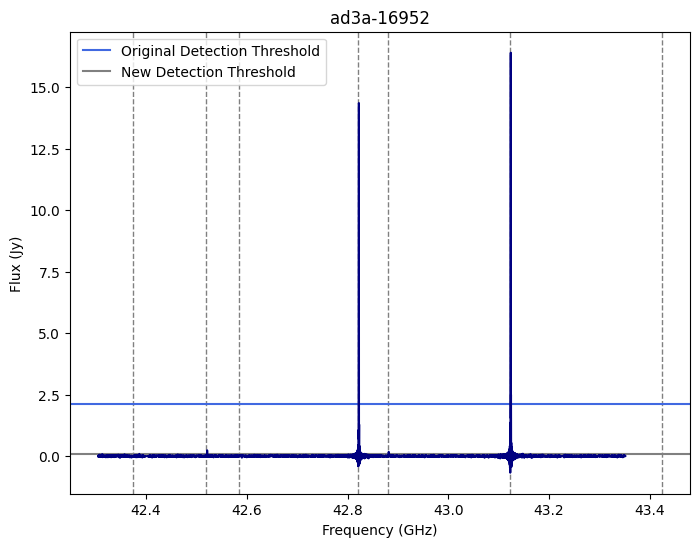

In [188]:
plt.figure(figsize=(8,6))
plt.plot(data_1['Frequency (GHz)'], data_1['Flux (Jy)'], color='navy')
for sf in stat_freq:
    plt.axvline(sf, color='gray', zorder=-1, ls='--', lw=1)
plt.axhline(D_flux_1, color='royalblue', zorder=-1,  label='Original Detection Threshold')
plt.axhline(D_flux_1_trim, color='gray', zorder=-1, label='New Detection Threshold')
plt.title(data_dict['data_1'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left')

In [189]:
detect_2_trim = detection_finder_trim(D_flux_2_trim,
                                      data_2['Frequency (GHz)'],
                                      data_2['Flux (Jy)'],
                                      data_dict['data_2'])

Freq (GHz) Flux (Jy)
42.8286352 0.134764
42.8291352 0.5608825
42.8293852 0.5034055
42.8296352 0.2186665
42.8298852 0.6317025
42.8301352 0.294047
42.8303852 0.1638065
42.8888852 0.128002
42.8891352 0.4320815
43.1301352 0.251604
43.1303852 0.2162825
43.1306352 0.7726025
43.1308852 0.302298
43.1311352 0.9261235
43.1313852 2.17373
43.1316352 0.990389
43.1318852 0.6644565
43.1321352 0.41782
43.1323852 0.1260865

There were 19 detections from the ad3a-16500 data set with the trimmed detection Threshold.


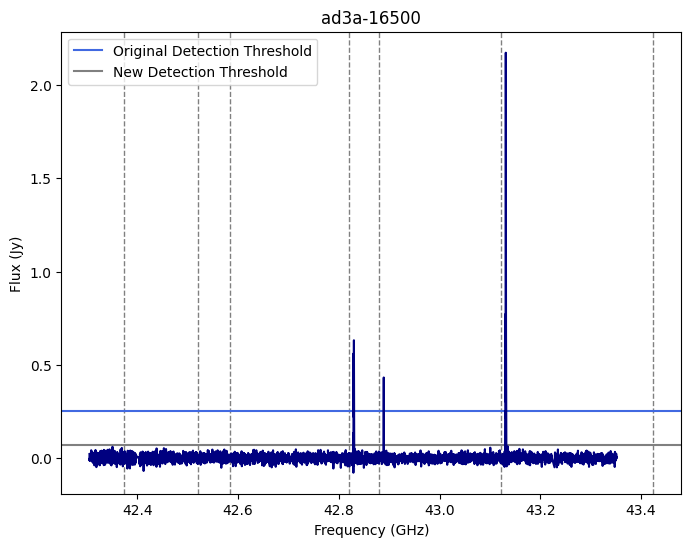

In [190]:
plt.figure(figsize=(8,6))
plt.plot(data_2['Frequency (GHz)'], data_2['Flux (Jy)'], color='navy')
for sf in stat_freq:
    plt.axvline(sf, color='gray', zorder=-1, ls='--', lw=1)
plt.axhline(D_flux_2, color='royalblue', zorder=-1,  label='Original Detection Threshold')
plt.axhline(D_flux_2_trim, color='gray', zorder=-1, label='New Detection Threshold')
plt.title(data_dict['data_2'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left')

In [191]:
detection_finder(data_3['Frequency (GHz)'],
                 data_3['Flux (Jy)'],
                 'original '+data_dict['data_3'])
print()
detect_3_trim = detection_finder_trim(D_flux_3_trim,
                                      data_3['Frequency (GHz)'],
                                      data_3['Flux (Jy)'],
                                      data_dict['data_3'])

Freq (GHz) Flux (Jy)
42.8181352 6.920915
42.8183852 4.64506
42.8186352 7.298905
42.8188852 24.356
42.8191352 8.914775
43.1196352 6.42612
43.1198852 11.1996
43.1203852 28.64865
43.1206352 26.12585
43.1208852 9.256465
43.1211352 7.74455

There were 11 detections from the original ad3a-17123 data set.

Freq (GHz) Flux (Jy)
42.3718852 0.18467
42.8176352 0.347331
42.8178852 1.48284
42.8181352 6.920915
42.8183852 4.64506
42.8186352 7.298905
42.8188852 24.356
42.8191352 8.914775
42.8196352 1.14211
42.8201352 0.2225335
42.8206352 0.132276
42.8211352 0.117374
42.8781352 0.3668885
42.8783852 2.643255
42.8786352 0.352148
43.1018852 0.124295
43.1038852 0.0996811
43.1048852 0.109592
43.1068852 0.1216275
43.1073852 0.1052217
43.1078852 0.1069845
43.1093852 0.1345075
43.1108852 0.13483
43.1113852 0.1038475
43.1118852 0.1131805
43.1123852 0.138049
43.1128852 0.1547795
43.1133852 0.1535305
43.1138852 0.17504
43.1143852 0.1785535
43.1148852 0.197006
43.1153852 0.1532985
43.1158852 0.245786
43.1163852 0.

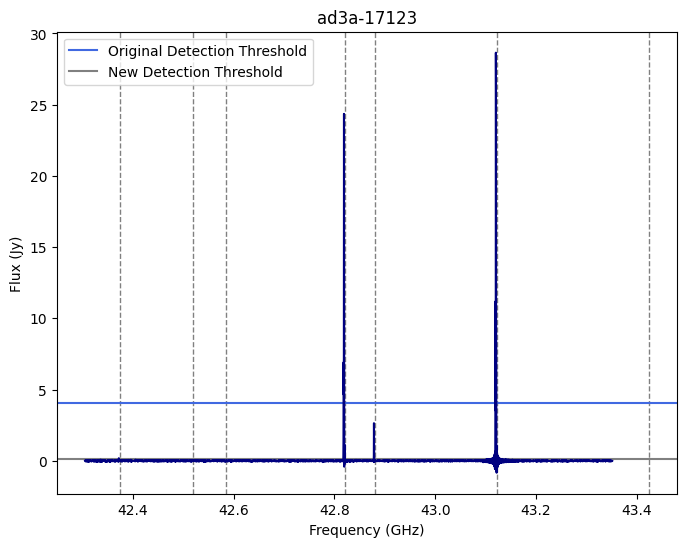

In [192]:
plt.figure(figsize=(8,6))
plt.plot(data_3['Frequency (GHz)'], data_3['Flux (Jy)'], color='navy')
for sf in stat_freq:
    plt.axvline(sf, color='gray', zorder=-1, ls='--', lw=1)
plt.axhline(D_flux_3, color='royalblue', zorder=-1,  label='Original Detection Threshold')
plt.axhline(D_flux_3_trim, color='gray', zorder=-1, label='New Detection Threshold')
plt.title(data_dict['data_3'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left')

In [193]:
detection_finder(data_4['Frequency (GHz)'],
                 data_4['Flux (Jy)'],
                 'original '+data_dict['data_4'])
print()
detect_4_trim = detection_finder_trim(D_flux_4_trim,
                                      data_4['Frequency (GHz)'],
                                      data_4['Flux (Jy)'],
                                      data_dict['data_4'])

Freq (GHz) Flux (Jy)
42.8241352 0.1797935
42.8243852 0.21201

There were 2 detections from the original ad3a-17332 data set.

Freq (GHz) Flux (Jy)
42.8241352 0.1797935
42.8243852 0.21201

There were 2 detections from the ad3a-17332 data set with the trimmed detection Threshold.


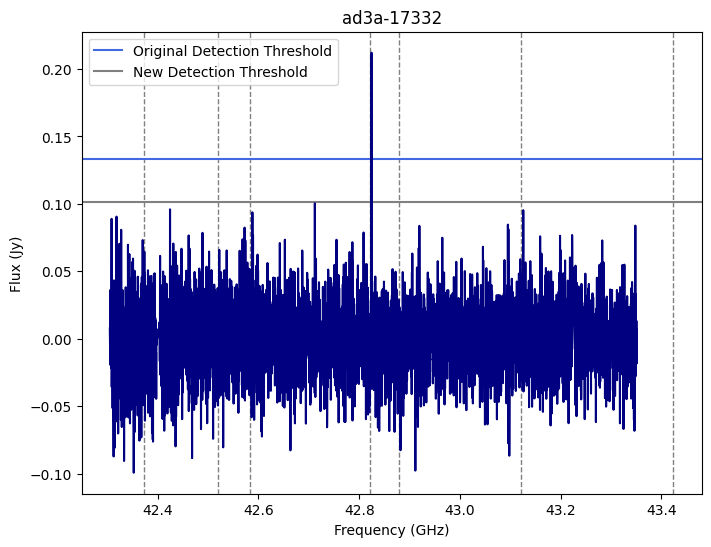

In [194]:
plt.figure(figsize=(8,6))
plt.plot(data_4['Frequency (GHz)'], data_4['Flux (Jy)'], color='navy')
for sf in stat_freq:
    plt.axvline(sf, color='gray', zorder=-1, ls='--', lw=1)
plt.axhline(D_flux_4, color='royalblue', zorder=-1,  label='Original Detection Threshold')
plt.axhline(D_flux_4_trim, color='gray', zorder=-1, label='New Detection Threshold')
plt.title(data_dict['data_4'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left')

In [195]:
detection_finder(data_5['Frequency (GHz)'],
                 data_5['Flux (Jy)'],
                 'original '+data_dict['data_5'])
print()
detect_5_trim = detection_finder_trim(D_flux_5_trim,
                                      data_5['Frequency (GHz)'],
                                      data_5['Flux (Jy)'],
                                      data_dict['data_5'])

Freq (GHz) Flux (Jy)
42.8316352 0.1469765
42.8318852 0.1016765
43.1331352 0.200794
43.1333852 0.2040785
43.1336352 0.1150905
43.1341352 0.232841
43.1343852 0.435967

There were 7 detections from the original ad3a-18081 data set.

Freq (GHz) Flux (Jy)
42.8316352 0.1469765
42.8318852 0.1016765
43.1331352 0.200794
43.1333852 0.2040785
43.1336352 0.1150905
43.1341352 0.232841
43.1343852 0.435967
43.1346352 0.0440152

There were 8 detections from the ad3a-18081 data set with the trimmed detection Threshold.


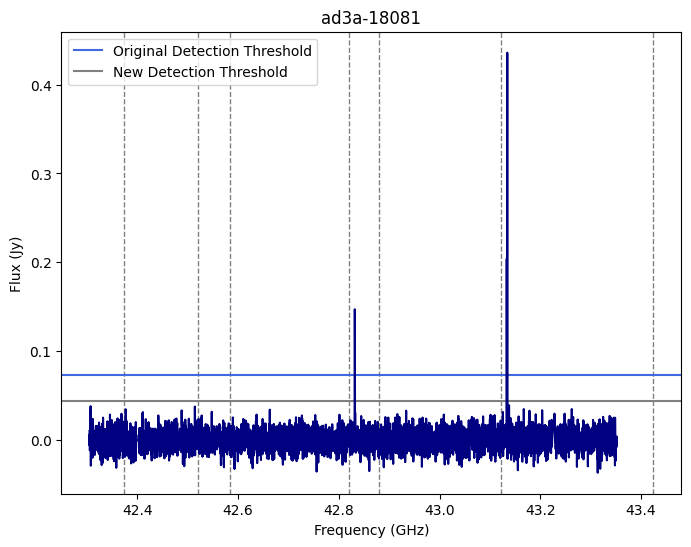

In [196]:
plt.figure(figsize=(8,6))
plt.plot(data_5['Frequency (GHz)'], data_5['Flux (Jy)'], color='navy')
for sf in stat_freq:
    plt.axvline(sf, color='gray', zorder=-1, ls='--', lw=1)
plt.axhline(D_flux_5, color='royalblue', zorder=-1,  label='Original Detection Threshold')
plt.axhline(D_flux_5_trim, color='gray', zorder=-1, label='New Detection Threshold')
plt.title(data_dict['data_5'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
plt.legend(loc='upper left')

Were you able to detect more lines than you originally were able to? If so, which lines were new and for what source(s)?

> I was able to detect more lines with the new detection threshold for 4 out of the 5 data sets.

## (Optional) 5. Functionalize your approach

Above you created a function to find the peak of a single line and perhaps some other functions. Here, put it all together and create a function that you can pass the file name and it will give you the velocity of the star. Your new function can use functions you created above.

In [212]:
def velocity_finder(data_set,  stat_freq, trimmed = False):
    data = pd.read_fwf(data_set+'.txt')
    orig_trim = 'original'

    freq = data['Frequency (GHz)']
    flux = data['Flux (Jy)']
    # Find peak - the values below are placeholders
    avg_flux = np.mean(flux)
    std_flux = np.std(flux)
    D_flux = avg_flux + 5*std_flux

    if trimmed == True:
        orig_trim = 'trimmed'
        data = data.sort_values(by=['Flux (Jy)'])
        data.reset_index(drop=True, inplace=True)
        fp_data = int(0.05*len(data['Flux (Jy)']))
        data_trim = data.iloc[fp_data:-fp_data] #drops first and last five percent
        data_trim.reset_index(drop=True, inplace=True)
        freq_trim = data_trim['Frequency (GHz)']
        flux_trim = data_trim['Flux (Jy)']
        # Find peak - the values below are placeholders
        avg_flux = np.mean(flux_trim)
        std_flux = np.std(flux_trim)
        D_flux = avg_flux + 5*std_flux

    freq_list = []
    flux_list = []
    for i in range(len(freq)):
      if flux[i] >= D_flux:
        freq_list.append(freq[i])
        flux_list.append(flux[i])

    detections = [freq_list, flux_list]

    print(f'There were {len(detections[0])} detections from the {data_set} data set '
          f'with the {orig_trim} detection Threshold.')

    vel_list = []
    stat_freq_list = []
    for i in range(len(freq_list)):   #for each observed frequency
        freq = freq_list[i]
        diff_freq = np.ones(len(stat_freq))
        for j in range(len(stat_freq)):   #for each stationary frequency
            diff_freq[j] = np.abs(stat_freq[j] - freq)
        #cl_freq: closest frequency
        #np.argmin(diff_freq) gives the index of the smallest difference
        cl_freq = stat_freq[np.argmin(diff_freq)]
        stat_freq_list.append(cl_freq)
        vel = (1-(freq/cl_freq))*c
        vel_list.append(vel)
    freq_array = [freq_list, stat_freq_list, vel_list]
    print()
    print('Obs_Freq   St_Freq  Vel(km/s)')
    array_trans = np.transpose(freq_array)
    for i in array_trans:
        print(*i)

    avg_vel = np.mean(vel_list)
    std_vel = np.std(vel_list)
    avg_error = std_vel/(np.sqrt(len(vel_list)))
    print()
    print(f'The average velocity is {avg_vel:.4f} km/s with '
          f'an average error of ±{avg_error:.4f} km/s.')

    return detections, vel_list

In [213]:
stat_freq = [42.373341, 42.51937500, 42.58382700, 42.82057000, 42.87994100, 43.12209000, 43.42385300]

In [214]:
detections_1, vel_list_1 = velocity_finder(data_dict['data_1'], stat_freq, True)

There were 66 detections from the ad3a-16952 data set with the trimmed detection Threshold.

Obs_Freq   St_Freq  Vel(km/s)
42.3863852 42.373341 -92.35193420311649
42.5211352 42.519375 -12.419279446174158
42.8151352 42.82057 38.076092868422066
42.8166352 42.82057 27.567124865413017
42.8171352 42.82057 24.06413553107667
42.8176352 42.82057 20.561146196773628
42.8181352 42.82057 17.05815686243728
42.8186352 42.82057 13.555167528100931
42.8191352 42.82057 10.05217819379789
42.8196352 42.82057 6.549188859428234
42.8201352 42.82057 3.046199525091886
42.8206352 42.82057 -0.45678980917784884
42.8211352 42.82057 -3.9597791435808105
42.8216352 42.82057 -7.462768477917159
42.8218852 42.82057 -9.21426314501872
42.8221352 42.82057 -10.965757812186894
42.8223852 42.82057 -12.717252479355068
42.8226352 42.82057 -14.468747146523242
42.8228852 42.82057 -16.22024181375803
42.8233852 42.82057 -19.723231148027764
42.8238852 42.82057 -23.226220482364113
42.8243852 42.82057 -26.72920981670046
42.8248852 42.

In [215]:
detections_2, vel_list_2 = velocity_finder(data_dict['data_2'], stat_freq, True)

There were 19 detections from the ad3a-16500 data set with the trimmed detection Threshold.

Obs_Freq   St_Freq  Vel(km/s)
42.8286352 42.82057 -56.50461915855942
42.8291352 42.82057 -60.00760849289577
42.8293852 42.82057 -61.75910315999733
42.8296352 42.82057 -63.510597827165505
42.8298852 42.82057 -65.26209249433367
42.8301352 42.82057 -67.01358716150185
42.8303852 42.82057 -68.76508182867002
42.8888852 42.879941 -62.576112219869806
42.8891352 42.879941 -64.32518179071423
43.1301352 43.12209 -55.97038547993094
43.1303852 43.12209 -57.70963327611511
43.1306352 43.12209 -59.44888107229929
43.1308852 43.12209 -61.18812886855007
43.1311352 43.12209 -62.92737666473425
43.1313852 43.12209 -64.66662446091843
43.1316352 43.12209 -66.4058722571026
43.1318852 43.12209 -68.14512005328677
43.1321352 43.12209 -69.88436784953755
43.1323852 43.12209 -71.62361564572173

The average velocity is -63.5628 km/s with an average error of ±0.9976 km/s.


In [216]:
detections_3, vel_list_3 = velocity_finder(data_dict['data_3'], stat_freq, True)

There were 72 detections from the ad3a-17123 data set with the trimmed detection Threshold.

Obs_Freq   St_Freq  Vel(km/s)
42.3718852 42.373341 10.306952194327756
42.8176352 42.82057 20.561146196773628
42.8178852 42.82057 18.809651529605453
42.8181352 42.82057 17.05815686243728
42.8183852 42.82057 15.306662195269105
42.8186352 42.82057 13.555167528100931
42.8188852 42.82057 11.803672860966063
42.8191352 42.82057 10.05217819379789
42.8196352 42.82057 6.549188859428234
42.8201352 42.82057 3.046199525091886
42.8206352 42.82057 -0.45678980917784884
42.8211352 42.82057 -3.9597791435808105
42.8781352 42.879941 12.633879323675767
42.8783852 42.879941 10.884809752931268
42.8786352 42.879941 9.135740182120156
43.1018852 43.12209 140.5646154905793
43.1038852 43.12209 126.65063312097269
43.1048852 43.12209 119.69364193620268
43.1068852 43.12209 105.77965956659608
43.1073852 43.12209 102.30116397416111
43.1078852 43.12209 98.82266838179277
43.1093852 43.12209 88.3871816046211
43.1108852 43.12209 7

In [217]:
detections_4, vel_list_4 = velocity_finder(data_dict['data_4'], stat_freq, True)

There were 2 detections from the ad3a-17332 data set with the trimmed detection Threshold.

Obs_Freq   St_Freq  Vel(km/s)
42.8241352 42.82057 -24.977715149532287
42.8243852 42.82057 -26.72920981670046

The average velocity is -25.8535 km/s with an average error of ±0.6192 km/s.


In [218]:
detections_5, vel_list_5 = velocity_finder(data_dict['data_5'], stat_freq, True)

There were 8 detections from the ad3a-18081 data set with the trimmed detection Threshold.

Obs_Freq   St_Freq  Vel(km/s)
42.8316352 42.82057 -77.52255516451089
42.8318852 42.82057 -79.27404983167906
43.1331352 43.12209 -76.84135903427425
43.1333852 43.12209 -78.58060683052503
43.1336352 43.12209 -80.3198546267092
43.1341352 43.12209 -83.79835021914417
43.1343852 43.12209 -85.53759801526172
43.1346352 43.12209 -87.27684581151252

The average velocity is -81.1439 km/s with an average error of ±1.2890 km/s.


> With the new detection threshold, if there are more "detections", the average error for the velocity calculation increases. I feel like the original method is better.